# Sentiment analysis (Logistic Regression)

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns

In [165]:
df = pd.read_csv("/content/drive/MyDrive/hamrah avval/week1/armankade.csv", sep='\t')
df.head()

,line,text,average tag
0,1,با تشکر از شما آقای عباسی,POSITIVE
1,2,برنامه خندوانه به زندگی ما انرژی داده مرسی,POSITIVE
2,3,مواظب کلیدت باش تو برفا گم نشه ،شب خونه راهت ن...,NEGATIVE
3,4,مایه افتخار ما شیرازی هاست که آقا اومدن اونجا ...,POSITIVE
4,5,@_zahra_str_75 بیخیار سالاد نمیشه,NATURAL


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   line         15000 non-null  int64 
 1   text         15000 non-null  object
 2   average tag  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


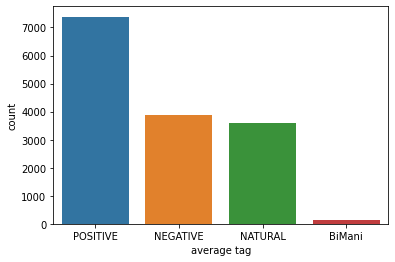

In [71]:
sns.countplot(df['average tag']);

## Data preprocessing

In [ ]:
!pip install hazm
!pip install clean-text[gpl]
!pip install demoji

In [166]:
import demoji
import re
from hazm import *
from cleantext import clean

normalizer = Normalizer(persian_numbers=False, persian_style=False, token_based=True)

def _replace_rep(t):
    "Replace repetitions at the character level: ccc -> c"
    def __replace_rep(m):
        c, cc = m.groups()
        if c.isdigit():
          return f"{c}{c}{c}"
        return f"{c}"  

    re_rep = re.compile(r"(\S)(\1{2,})")
    return re_rep.sub(__replace_rep, t)

def _normalize_text(x):
    """normalize a sentence"""
    # x = str(x)
    # Remove mentions
    x = re.sub('@[^ ]* ', '', x)
    x = demoji.replace(x, repl=" ")
    x = _replace_rep(x)
    
    x = re.sub(r"\s+", " ", x)  # remove more than one white spaces with space
    # Remove HTML markup
    x = re.sub('<[^>]*>', '', x)

    x = re.sub('(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', ' ', x)
    x = re.sub(r"(\/|\\)+", " ", x) 
    
    # regular cleaning
    x = clean(x,
        fix_unicode=True,
        to_ascii=False,
        lower=True,
        no_line_breaks=True,
        no_urls=True,
        no_emails=True,
        no_phone_numbers=True,
        no_numbers=True,
        no_digits=True,
        no_currency_symbols=True,
        no_punct=True,
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="0",
        replace_with_currency_symbol="",
        replace_with_punct=""
    )

    # normalizing
    x = normalizer.normalize(x)
    return x


df['text'] = df['text'].apply(_normalize_text)

In [49]:
from collections import Counter

vocab = Counter()
for t in df['text']:
    for word in t.split(' '):
        vocab[word] += 1

vocab.most_common(20)

[('و', 2111),
 ('به', 2073),
 ('از', 1572),
 ('که', 1558),
 ('تو', 1360),
 ('این', 1346),
 ('رو', 1207),
 ('', 1095),
 ('من', 914),
 ('با', 898),
 ('خیلی', 876),
 ('هم', 852),
 ('شما', 830),
 ('ما', 683),
 ('یه', 598),
 ('در', 572),
 ('ای', 547),
 ('سلام', 531),
 ('خدا', 480),
 ('بود', 477)]

In [168]:
STOPWORDS = [
"و" ,
"در" ,
"به" ,
"از" ,
"که" ,
"این" ,
"را" ,
"با" ,
"است" ,
"برای" ,
"آن" ,
"یک" ,
"خود" ,
"تا" ,
"کرد" ,
"بر" ,
"هم" ,
"نیز" ,
"گفت" ,
"می‌شود" ,
"وی" ,
"شد" ,
"دارد" ,
"ما" ,
"اما" ,
"یا" ,
"شده" ,
"باید" ,
"هر" ,
"آنها" ,
"بود" ,
"او" ,
"دیگر" ,
"دو" ,
"مورد" ,
"می‌کند" ,
"شود" ,
"کند" ,
"وجود" ,
"بین" ,
"پیش" ,
"شده_است" ,
"پس" ,
"نظر" ,
"اگر" ,
"همه" ,
"یکی" ,
"حال" ,
"هستند" ,
"من" ,
"کنند" ,
"نیست" ,
"باشد" ,
"چه" ,
"بی" ,
"می" ,
"بخش" ,
"می‌کنند" ,
"همین" ,
"افزود" ,
"هایی" ,
"دارند" ,
"راه" ,
"همچنین" ,
"روی" ,
"داد" ,
"بیشتر" ,
"بسیار" ,
"سه" ,
"داشت" ,
"چند" ,
"سوی" ,
"تنها" ,
"هیچ" ,
"میان" ,
"اینکه" ,
"شدن" ,
"بعد" ,
"جدید" ,
"ولی" ,
"حتی" ,
"کردن" ,
"برخی" ,
"کردند" ,
"می‌دهد" ,
"اول" ,
"نه" ,
"کرده_است" ,
"نسبت" ,
"بیش" ,
"شما" ,
"چنین" ,
"طور" ,
"افراد" ,
"تمام" ,
"درباره" ,
"بار" ,
"بسیاری" ,
"می‌تواند" ,
"کرده" ,
"چون" ,
"ندارد" ,
"دوم" ,
"بزرگ" ,
"طی" ,
"حدود" ,
"همان" ,
"بدون" ,
"البته" ,
"آنان" ,
"می‌گوید" ,
"دیگری" ,
"خواهد_شد" ,
"کنیم" ,
"قابل" ,
"یعنی" ,
"رشد" ,
"می‌توان" ,
"وارد" ,
"کل" ,
"ویژه" ,
"قبل" ,
"براساس" ,
"نیاز" ,
"گذاری" ,
"هنوز" ,
"لازم" ,
"سازی" ,
"بوده_است" ,
"چرا" ,
"می‌شوند" ,
"وقتی" ,
"گرفت" ,
"کم" ,
"جای" ,
"حالی" ,
"تغییر" ,
"پیدا" ,
"اکنون" ,
"تحت" ,
"باعث" ,
"مدت" ,
"فقط" ,
"زیادی" ,
"تعداد" ,
"آیا" ,
"بیان" ,
"رو" ,
"شدند" ,
"عدم" ,
"کرده_اند" ,
"بودن" ,
"نوع" ,
"بلکه" ,
"جاری" ,
"دهد" ,
"برابر" ,
"مهم" ,
"بوده" ,
"اخیر" ,
"مربوط" ,
"امر" ,
"زیر" ,
"گیری" ,
"شاید" ,
"خصوص" ,
"آقای" ,
"اثر" ,
"کننده" ,
"بودند" ,
"فکر" ,
"کنار" ,
"اولین" ,
"سوم" ,
"سایر" ,
"کنید" ,
"ضمن" ,
"مانند" ,
"باز" ,
"می‌گیرد" ,
"ممکن" ,
"حل" ,
"دارای" ,
"پی" ,
"مثل" ,
"می‌رسد" ,
"اجرا" ,
"دور" ,
"منظور" ,
"کسی" ,
"موجب" ,
"طول" ,
"امکان" ,
"آنچه" ,
"تعیین" ,
"گفته" ,
"شوند" ,
"جمع" ,
"خیلی" ,
"علاوه" ,
"گونه" ,
"تاکنون" ,
"رسید" ,
"ساله" ,
"گرفته" ,
"شده_اند" ,
"علت" ,
"چهار" ,
"داشته_باشد" ,
"خواهد_بود" ,
"طرف" ,
"تهیه" ,
"تبدیل" ,
"مناسب" ,
"زیرا" ,
"مشخص" ,
"می‌توانند" ,
"نزدیک" ,
"جریان" ,
"روند" ,
"بنابراین" ,
"می‌دهند" ,
"یافت" ,
"نخستین" ,
"بالا" ,
"پنج" ,
"ریزی" ,
"عالی" ,
"چیزی" ,
"نخست" ,
"بیشتری" ,
"ترتیب" ,
"شده_بود" ,
"خاص" ,
"خوبی" ,
"خوب" ,
"شروع" ,
"فرد" ,
"کامل" ,
"غیر" ,
"می‌رود" ,
"دهند" ,
"آخرین" ,
"دادن" ,
"جدی" ,
"بهترین" ,
"شامل" ,
"گیرد" ,
"بخشی" ,
"باشند" ,
"تمامی" ,
"بهتر" ,
"داده_است" ,
"حد" ,
"نبود" ,
"کسانی" ,
"می‌کرد" ,
"داریم" ,
"علیه" ,
"می‌باشد" ,
"دانست" ,
"ناشی" ,
"داشتند" ,
"دهه" ,
"می‌شد" ,
"ایشان" ,
"آنجا" ,
"گرفته_است" ,
"دچار" ,
"می‌آید" ,
"لحاظ" ,
"آنکه" ,
"داده" ,
"بعضی" ,
"هستیم" ,
"اند" ,
"برداری" ,
"نباید" ,
"می‌کنیم" ,
"نشست" ,
"سهم" ,
"همیشه" ,
"آمد" ,
"اش" ,
"وگو" ,
"می‌کنم" ,
"حداقل" ,
"طبق" ,
"جا" ,
"خواهد_کرد" ,
"نوعی" ,
"چگونه" ,
"رفت" ,
"هنگام" ,
"فوق" ,
"روش" ,
"ندارند" ,
"سعی" ,
"بندی" ,
"شمار" ,
"کلی" ,
"کافی" ,
"مواجه" ,
"همچنان" ,
"زیاد" ,
"سمت" ,
"کوچک" ,
"داشته_است" ,
"چیز" ,
"پشت" ,
"آورد" ,
"حالا" ,
"روبه" ,
"سال‌های" ,
"دادند" ,
"می‌کردند" ,
"عهده" ,
"نیمه" ,
"جایی" ,
"دیگران" ,
"سی" ,
"بروز" ,
"یکدیگر" ,
"آمده_است" ,
"جز" ,
"کنم" ,
"سپس" ,
"کنندگان" ,
"خودش" ,
"همواره" ,
"یافته" ,
"شان" ,
"صرف" ,
"نمی‌شود" ,
"رسیدن" ,
"چهارم" ,
"یابد" ,
"متر" ,
"ساز" ,
"داشته" ,
"کرده_بود" ,
"باره" ,
"نحوه" ,
"کردم" ,
"تو" ,
"شخصی" ,
"داشته_باشند" ,
"محسوب" ,
"پخش" ,
"کمی" ,
"متفاوت" ,
"سراسر" ,
"کاملا" ,
"داشتن" ,
"نظیر" ,
"آمده" ,
"گروهی" ,
"فردی" ,
"ع" ,
"همچون" ,
"خطر" ,
"خویش" ,
"کدام" ,
"دسته" ,
"سبب" ,
"عین" ,
"آوری" ,
"متاسفانه" ,
"بیرون" ,
"دار" ,
"ابتدا" ,
"شش" ,
"افرادی" ,
"می‌گویند" ,
"سالهای" ,
"درون" ,
"نیستند" ,
"یافته_است" ,
"پر" ,
"خاطرنشان" ,
"گاه" ,
"جمعی" ,
"اغلب" ,
"دوباره" ,
"می‌یابد" ,
"لذا" ,
"زاده" ,
"گردد" ,
"اینجا"
]

In [169]:
# remove stop words
df['text'] = df['text'].map(lambda x: ' '.join([word for word in x.split() if word not in STOPWORDS]))

In [52]:
vocab = Counter()
for t in df['text']:
    for word in t.split(' '):
        vocab[word] += 1

vocab.most_common(20)

[('یه', 598),
 ('ای', 547),
 ('سلام', 531),
 ('خدا', 480),
 ('دارم', 427),
 ('دوست', 401),
 ('روحانی', 397),
 ('اقای', 365),
 ('رامبد', 353),
 ('میشه', 344),
 ('ها', 343),
 ('مردم', 336),
 ('اون', 332),
 ('های', 321),
 ('واقعا', 320),
 ('جوان', 320),
 ('رهبر', 314),
 ('ی', 314),
 ('جانم', 309),
 ('برنامه', 306)]

In [171]:
df.head()

,line,text,average tag
0,1,تشکر عباسی,POSITIVE
1,2,برنامه خندوانه زندگی انرژی مرسی,POSITIVE
2,3,مواظب کلیدت باش برفا گم نشه شب خونه راهت نمیدن,NEGATIVE
3,4,مایه افتخار شیرازی هاست آقا اومدن اونجا قربون ...,POSITIVE
4,5,بیخیار سالاد نمیشه,NATURAL


## Split the dataset

In [201]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y = le.fit_transform(df['average tag'])

In [203]:
from sklearn.model_selection import train_test_split

# split the dataset in train and test
X = df['text']
# 'stratify' will create a train set with the same class balance than the original set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## Logistic Regression

In [213]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

params = [{
            'vect__max_features': (None, 10000, 15000),
            'vect__max_df': (0.75, 1.0),
            'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
           },
          # {
          #   'vect__max_features': (None, 10000, 15000),
          #   'vect__max_df': (0.75, 1.0),
          #   'clf__penalty': ['l1', 'l2'],
          #   'clf__C': [1.0, 10.0, 100.0],
          #   # 'clf__multi_class': []
          # }
          ]

pipeline = Pipeline([('vect', TfidfVectorizer(lowercase=False)),
                     ('clf', LogisticRegression(multi_class='auto', random_state=0))])

gs = GridSearchCV(pipeline, params,
                           scoring='accuracy',
                           cv=5,
                           verbose=3,
                           n_jobs=-1)

In [214]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid=[{'clf__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                          'sag', 'saga'],
                          'vect__max_df': (0.75, 1.0),
                          'vect__max_features': (None, 10000, 15000)}],
             scoring='accuracy', verbose=3)

In [215]:
print('Best parameter set: ' + str(gs.best_params_))
print('Best accuracy: %.3f' % gs.best_score_)

Best parameter set: {'clf__solver': 'newton-cg', 'vect__max_df': 0.75, 'vect__max_features': 15000}
Best accuracy: 0.664


In [216]:
clf = gs.best_estimator_
print('Accuracy in test: %.3f' % clf.score(X_test, y_test))

Accuracy in test: 0.680


## Multi class Logistic Regression Using OVR

One Vs Rest => set multi_class='ovr' and we must use 'liblinear' solver with it